In [0]:
from os.path import join
from google.colab import drive
# Montar el DRIVE
ROOT = "/content/drive"
drive.mount(ROOT)# Apuntar a la carpeta de trabajo
PROJ = "My Drive/MSI-MSS_project" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.fftpack import fft
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap
from skimage.exposure import rescale_intensity
from PIL import Image

In [0]:
set_completo = pd.read_pickle(join(PROJECT_PATH,'final_subset_Color.pkl'))

In [0]:
set_completo["label"] = np.where((set_completo["label"]=="MSI"),0,1)

In [0]:
set_completo["label"].value_counts()

1    2000
0    2000
Name: label, dtype: int64

In [0]:
def normalizeImage(series_value):
  return (series_value/np.amax(series_value))*255 

In [0]:
set_completo["image_array_norm"] = set_completo["image_array"].apply(normalizeImage)
#set_completo["image_array_Float"] = set_completo["image_array_Float"].apply(normalizeImage)

In [0]:
#set_completo["image_array"][0].shape

In [0]:
#type(set_completo["image_array"][0][0][0][0])

In [0]:
#type(set_completo["image_array_Float"][0][0][0][0])

In [0]:
#type(set_completo["image_array_Float"][0])

In [0]:
#def hemat(value):
  #return rgb2hed(value)[:, :, 0]

In [0]:
#set_completo["hematoxilyn"] = set_completo["resize"].apply(hemat)
#set_completo["hematoxilyn"] = set_completo["image_array"].apply(hemat)

In [0]:
#def eosin(value):
  #return rgb2hed(value)[:, :, 1]

In [0]:
#set_completo["eosin"] = set_completo["resize"].apply(eosin)

In [0]:
def eosinhemat(value):
  img = rgb2hed(value)
  img = np.delete(img, 2, 2)
  return img

In [0]:
set_completo["eosinhemat"] = set_completo["image_array_norm"].apply(eosinhemat)

In [0]:
set_completo["image_array"][0].shape

(224, 224, 3)

In [0]:
set_completo["eosinhemat"][0].shape

(224, 224, 2)

In [0]:
set_completo["image_array"]

0       [[[207, 131, 178], [216, 161, 201], [178, 126,...
1       [[[216, 136, 187], [205, 121, 173], [195, 108,...
2       [[[254, 246, 244], [253, 238, 243], [255, 229,...
3       [[[159, 101, 152], [186, 129, 182], [210, 155,...
4       [[[173, 105, 156], [203, 141, 182], [203, 159,...
                              ...                        
3995    [[[236, 187, 217], [233, 175, 190], [206, 173,...
3996    [[[242, 236, 240], [242, 236, 240], [242, 236,...
3997    [[[154, 80, 129], [126, 57, 104], [106, 42, 92...
3998    [[[204, 122, 171], [202, 120, 168], [207, 128,...
3999    [[[243, 191, 214], [249, 199, 226], [255, 203,...
Name: image_array, Length: 4000, dtype: object

In [0]:
set_completo["eosinhemat"]

0       [[[-0.5573394706236015, 0.20525542089795554], ...
1       [[[-0.563893600710291, 0.20959697133366895], [...
2       [[[-0.5804545026754465, 0.17083457887879233], ...
3       [[[-0.5122674414920072, 0.19051524011074597], ...
4       [[[-0.5273976073825201, 0.19762005263411195], ...
                              ...                        
3995    [[[-0.5728670705678643, 0.19283577016141046], ...
3996    [[[-0.5693139984648551, 0.16935857901520537], ...
3997    [[[-0.516393562667171, 0.19709004547982822], [...
3998    [[[-0.5569977746436402, 0.20825514225227854], ...
3999    [[[-0.5814015826388946, 0.1932402383652399], [...
Name: eosinhemat, Length: 4000, dtype: object

In [0]:
def onechannel(value):
  img = Image.fromarray((value * 255).astype(np.uint8))
  return np.array(img.convert('L'))

In [0]:
set_completo["eosinhemat_bnw"] = set_completo["eosinhemat"].apply(onechannel)

In [0]:
set_completo["eosinhemat_bnw"]

0       [[114, 114, 122, 126, 120, 115, 111, 115, 117,...
1       [[113, 114, 116, 127, 138, 140, 139, 134, 121,...
2       [[108, 109, 108, 111, 117, 120, 121, 121, 119,...
3       [[126, 121, 117, 126, 125, 123, 122, 121, 132,...
4       [[122, 116, 117, 114, 115, 118, 116, 118, 120,...
                              ...                        
3995    [[110, 109, 117, 125, 116, 113, 118, 115, 117,...
3996    [[111, 111, 111, 111, 112, 112, 112, 112, 112,...
3997    [[125, 131, 136, 139, 133, 130, 126, 117, 114,...
3998    [[114, 115, 114, 114, 115, 115, 113, 114, 113,...
3999    [[108, 108, 107, 108, 112, 115, 119, 121, 131,...
Name: eosinhemat_bnw, Length: 4000, dtype: object

In [0]:
#def img_to_gray_scale(value):
  #return cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)

In [0]:
#set_completo["bnw"] = set_completo["hematoxilyn"].apply(img_to_gray_scale)

In [0]:
#def typeFloat(values):
  #return values.astype("float32")

In [0]:
#set_completo["image_array_Float"] = set_completo["image_array"]
#set_completo["image_array_Float"] = set_completo["image_array"].apply(typeFloat)

In [0]:
set_completo["hematoxilyn"]

0       [[216.71888561072117, 205.92714691609868, 197....
1       [[211.42910708027998, 212.0977971198585, 212.4...
2       [[151.79838951307073, 155.70151439421485, 162....
3       [[192.14520482006586, 196.664214374466, 200.15...
4       [[207.6468273762937, 206.3521694616646, 193.49...
                              ...                        
3995    [[212.39753144965434, 211.18446164541442, 198....
3996    [[157.69041088490923, 157.69041088490923, 157....
3997    [[192.71242618021503, 185.29510970957375, 180....
3998    [[226.72504730447096, 226.08627195997417, 224....
3999    [[180.51596488585477, 181.7405134069716, 184.4...
Name: hematoxilyn, Length: 4000, dtype: object

In [0]:
#set_completo["image_array_Float"]

In [0]:
#def sizeImage(series_value, size=(100,100)):
    #return cv2.resize(series_value, size, interpolation=cv2.INTER_NEAREST) 

In [0]:

#set_completo["resize"] = set_completo["image_array_Float"]
#set_completo["resize"] = set_completo["image_array_Float"].apply(sizeImage)

In [0]:
#set_completo["hematoxilyn"] = set_completo["hematoxilyn"].apply(typeFloat)

In [0]:
#def imageDenoiseMEdianBlur(series_value):
  #return cv2.bilateralFilter(series_value,10,75,75)

In [0]:
#set_completo["blur"] = set_completo["hematoxilyn"].apply(imageDenoiseMEdianBlur)

In [0]:
def images_to_bw(value):
  return cv2.threshold(value, 180, 255, cv2.THRESH_BINARY)[1]

In [0]:
set_completo["bnw_thr"] = set_completo["hematoxilyn"].apply(images_to_bw)

In [0]:
np.amin(set_completo["hematoxilyn"][3000])

158.5543342185097

In [0]:
set_completo["bnw"]

In [0]:
"""
def img_to_gray_scale(list_of_images):
        return [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in list_of_images]
"""

In [0]:
#type(set_completo["hematoxilyn"][0][0][0])

In [0]:
#def DAB(value):
  #return rgb2hed(value)[:, :, 2]

In [0]:
#set_completo["DAB"] = set_completo["resize"].apply(DAB)

In [0]:
#def hematINT(value):
  #return rescale_intensity(value, out_range=(0, 1))

In [0]:
#set_completo["hematoxilyn"] = set_completo["hematoxilyn"].apply(hematINT)

In [0]:
#print(set_completo["image_array"][0].shape,set_completo["hematoxilyn"][0].shape, set_completo["resize"][0].shape)

In [0]:
#set_completo["resize"][0].shape

'\n\nax[2].imshow(h)\nax[2].set_title("h")\n\nax[3].imshow(set_completo["resize"][i])\nax[3].set_title("resize")\n\n'

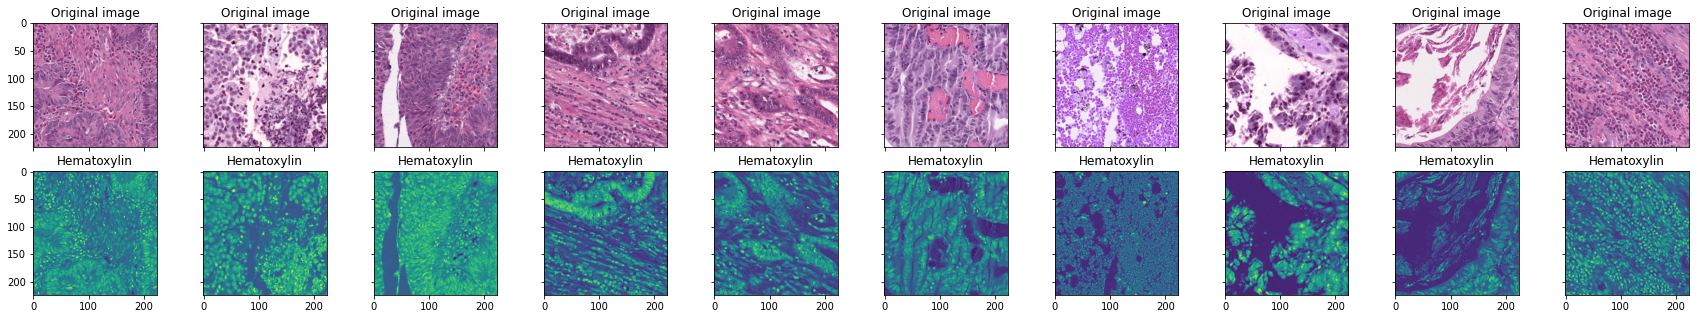

In [0]:
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
#cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white','saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet','white'])

fig, axes = plt.subplots(2, 10, figsize=(30, 5), sharex=True, sharey=True)
ax = axes.ravel()

i= 0
j= 2000
#h = rescale_intensity(set_completo["hematoxilyn"][i], out_range=(0, 1))

ax[0].imshow(set_completo["image_array"][i+1])
ax[0].set_title("Original image")
ax[1].imshow(set_completo["image_array"][i+2])
ax[1].set_title("Original image")
ax[2].imshow(set_completo["image_array"][i+3])
ax[2].set_title("Original image")
ax[3].imshow(set_completo["image_array"][i+4])
ax[3].set_title("Original image")
ax[4].imshow(set_completo["image_array"][i+5])
ax[4].set_title("Original image")
ax[5].imshow(set_completo["image_array"][j+1])
ax[5].set_title("Original image")
ax[6].imshow(set_completo["image_array"][j+2])
ax[6].set_title("Original image")
ax[7].imshow(set_completo["image_array"][j+3])
ax[7].set_title("Original image")
ax[8].imshow(set_completo["image_array"][j+4])
ax[8].set_title("Original image")
ax[9].imshow(set_completo["image_array"][j+5])
ax[9].set_title("Original image")

ax[10].imshow(set_completo["eosinhemat_bnw"][i+1])
ax[10].set_title("Hematoxylin")
ax[11].imshow(set_completo["eosinhemat_bnw"][i+2])
ax[11].set_title("Hematoxylin")
ax[12].imshow(set_completo["eosinhemat_bnw"][i+3])
ax[12].set_title("Hematoxylin")
ax[13].imshow(set_completo["eosinhemat_bnw"][i+4])
ax[13].set_title("Hematoxylin")
ax[14].imshow(set_completo["eosinhemat_bnw"][i+5])
ax[14].set_title("Hematoxylin")
ax[15].imshow(set_completo["eosinhemat_bnw"][j+1])
ax[15].set_title("Hematoxylin")
ax[16].imshow(set_completo["eosinhemat_bnw"][j+2])
ax[16].set_title("Hematoxylin")
ax[17].imshow(set_completo["eosinhemat_bnw"][j+3])
ax[17].set_title("Hematoxylin")
ax[18].imshow(set_completo["eosinhemat_bnw"][j+4])
ax[18].set_title("Hematoxylin")
ax[19].imshow(set_completo["eosinhemat_bnw"][j+5])
ax[19].set_title("Hematoxylin")
"""

ax[2].imshow(h)
ax[2].set_title("h")

ax[3].imshow(set_completo["resize"][i])
ax[3].set_title("resize")

"""

In [0]:
np.amax(set_completo["resize"][3500])

1.0

In [0]:
def fftransform(array):
    '''fft to all the array images (column in this case)'''
    return np.abs(fft(array))

In [0]:
#set_completo["fft"] = set_completo["resize"].apply(fftransform)

In [0]:
#set_completo.head()

,label,image_array,resize,fft,fftNorm
0,0,"[[[207, 131, 178], [216, 161, 201], [178, 126,...","[[[174, 117, 161], [161, 90, 139], [172, 109, ...","[[[452.0, 51.73973328110612, 51.73973328110612...","[[[0.7363387978142076, 0.06442527935820544, 0...."
1,0,"[[[216, 136, 187], [205, 121, 173], [195, 108,...","[[[164, 96, 150], [172, 104, 155], [174, 109, ...","[[[410.0, 62.193247221864844, 62.1932472218648...","[[[0.6675862068965517, 0.09333559818326713, 0...."
2,0,"[[[254, 246, 244], [253, 238, 243], [255, 229,...","[[[185, 140, 181], [164, 112, 163], [185, 149,...","[[[506.0, 43.139309220245984, 43.1393092202459...","[[[0.9148099606815203, 0.04094495242939268, 0...."
3,0,"[[[159, 101, 152], [186, 129, 182], [210, 155,...","[[[150, 95, 151], [152, 95, 152], [149, 94, 15...","[[[396.0, 55.50675634551167, 55.50675634551167...","[[[0.42363877822045154, 0.08262597731900281, 0..."
4,0,"[[[173, 105, 156], [203, 141, 182], [203, 159,...","[[[186, 128, 174], [187, 125, 172], [213, 171,...","[[[488.0, 53.028294334251406, 53.0282943342514...","[[[0.776158940397351, 0.05957320832860667, 0.0..."


In [0]:
X=np.asarray(list(set_completo['eosinhemat_bnw']))
X = X.reshape(X.shape[0], -1)
y=np.asarray(set_completo['label'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
model = RandomForestClassifier()

In [0]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=model.predict(X_test)

In [0]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall", recall_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred, average='weighted'))
print("F1Score",f1_score(y_test, y_pred),"\n")

Accuracy 0.51125
Precision 0.5365168539325843
Precision 0.5147213470492964
Recall 0.4580335731414868
Recall 0.51125
F1Score 0.4941785252263907 



,gt,predicted,proba MSI,proba MSS
0,0,1,0.49,0.51
1,0,1,0.35,0.65
2,1,1,0.49,0.51
3,1,1,0.45,0.55
4,1,1,0.47,0.53


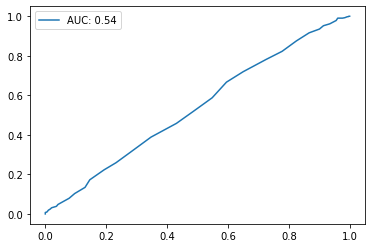

In [0]:
y_score = model.predict_proba(X_test)

#print(y_score)
roc = roc_curve(y_test, y_score[:,1])
display(pd.DataFrame({
    "gt":y_test,
    "predicted":y_pred,
    "proba MSI":y_score[:,0],
    "proba MSS":y_score[:,1]
}).head())

plt.plot(roc[0],roc[1])
plt.legend(["AUC: {}".format(round(roc_auc_score(y_test, y_score[:,1]),2))])

In [0]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,218,165
1,226,191
